<a href="https://colab.research.google.com/github/mariavwanderley/REGRESS-O-FINAL/blob/main/analise_sentimentos_pl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df_corpus = pd.read_csv("/content/dic_pl_2159.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_corpus

,data,link,texto,sentimento_final
0,2024-05-05,https://x.com/Imaranhao_com/status/19194759569...,A Justiça Federal autorizou nesta segunda-feir...,positivo
1,2024-05-05,https://x.com/revistatae/status/19194229717199...,Licenciamento ambiental do Complexo Hidrelétri...,positivo
2,2024-05-05,https://x.com/ambientalfelipe/status/191937681...,Eu prestei consultoria ambiental pra um client...,neutro
3,2025-05-05,https://x.com/acendebrasil/status/191944664517...,"Além disso, o órgão sofre pressões políticas e...",neutro
4,2025-05-05,https://x.com/acendebrasil/status/191944664195...,"O Ibama, órgão responsável pelo licenciamento ...",neutro
...,...,...,...,...
586,2025-06-01,https://x.com/petbiologiaufam/status/192897088...,❗️MOBILIZAÇÃO CONTRA O PL 2159/2021! | Estamos...,negativo
587,2025-06-03,https://x.com/elisiopeixoto/status/19300111775...,"O PL 2.159/2021, conhecido como Lei Geral do L...",negativo
588,2025-06-03,https://x.com/llemauro/status/1929850589732602327,A Câmara pode votar a qualquer momento um PL q...,neutro
589,2025-06-03,https://x.com/malu_psi/status/1929850523290571080,O PL da Devastação está pronto pra ser pautado...,negativo


In [ ]:
df_corpus.head(3)

,data,link,texto,sentimento_final
0,2024-05-05,https://x.com/Imaranhao_com/status/19194759569...,A Justiça Federal autorizou nesta segunda-feir...,positivo
1,2024-05-05,https://x.com/revistatae/status/19194229717199...,Licenciamento ambiental do Complexo Hidrelétri...,positivo
2,2024-05-05,https://x.com/ambientalfelipe/status/191937681...,Eu prestei consultoria ambiental pra um client...,neutro


#extração de features

<Axes: xlabel='sentimento_final'>

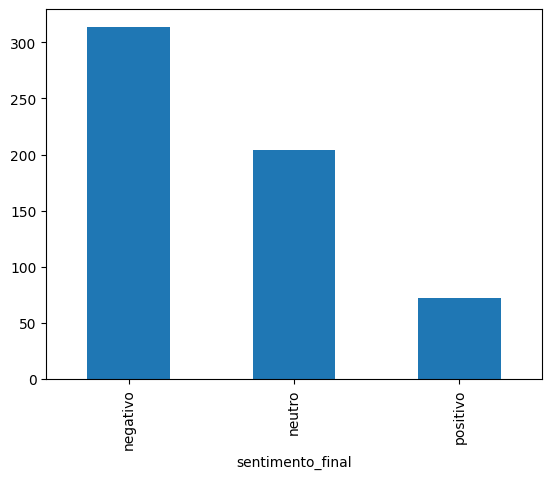

In [ ]:
df_corpus['sentimento_final'].value_counts().plot(kind='bar')

In [ ]:
#eliminando NaN do corpus
df_corpus_sem_na = df_corpus.dropna()          ###remove as linhas que possuem valores ausentes ou nulos

In [ ]:
print(df_corpus_sem_na)   ####somente para vizualizar

           data                                               link  \
0    2024-05-05  https://x.com/Imaranhao_com/status/19194759569...   
1    2024-05-05  https://x.com/revistatae/status/19194229717199...   
2    2024-05-05  https://x.com/ambientalfelipe/status/191937681...   
3    2025-05-05  https://x.com/acendebrasil/status/191944664517...   
4    2025-05-05  https://x.com/acendebrasil/status/191944664195...   
..          ...                                                ...   
586  2025-06-01  https://x.com/petbiologiaufam/status/192897088...   
587  2025-06-03  https://x.com/elisiopeixoto/status/19300111775...   
588  2025-06-03  https://x.com/llemauro/status/1929850589732602327   
589  2025-06-03  https://x.com/malu_psi/status/1929850523290571080   
590  2025-06-03  https://x.com/abrilabrilpt/status/192984803520...   

                                                 texto sentimento_final  
0    A Justiça Federal autorizou nesta segunda-feir...         positivo  
1    Licenc

In [ ]:
#lista de labels sem NaNs
sentimento_final = list(df_corpus_sem_na['sentimento_final'].values)
sentimento_final

['positivo',
 'positivo',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'negativo',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'negativo',
 'neutro',
 'negativo',
 'neutro',
 'neutro',
 'neutro',
 'negativo',
 'neutro',
 'negativo',
 'neutro',
 'neutro',
 'neutro',
 'negativo',
 'neutro',
 'neutro',
 'positivo',
 'negativo',
 'neutro',
 'neutro',
 'negativo',
 'neutro',
 'negativo',
 'negativo',
 'negativo',
 'neutro',
 'neutro',
 'negativo',
 'neutro',
 'neutro',
 'neutro',
 'positivo',
 'neutro',
 'neutro',
 'negativo',
 'negativo',
 'neutro',
 'neutro',
 'neutro',
 'positivo',
 'positivo',
 'positivo',
 'positivo',
 'neutro',
 'neutro',
 'neutro',
 'negativo',
 'neutro',
 'neutro',
 'neutro',
 'positivo',
 'negativo',
 'neutro',
 'neutro',
 'negativo',
 'negativo',
 'neutro',
 'neutro',
 'neutro',
 'neutro',
 'positivo',
 'neutro',
 'neutro',
 'neutro'

In [ ]:
#lista de textos sem NaNs
textos = list(df_corpus_sem_na['texto'].values)
textos

['A Justiça Federal autorizou nesta segunda-feira (5/5) que o Consórcio Urbia realize obras em Jericoacoara sem licenciamento ambiental municipal.',
 'Licenciamento ambiental do Complexo Hidrelétrico Sustentável Rio dos Patos\r\r\nhttps://revistatae.com.br/Noticia/91300/licenciamento-ambiental-do-complexo-hidreletrico-sustentavel-rio-dos-patos',
 'Eu prestei consultoria ambiental pra um cliente que era uma MARMORARIA.\r\r\n\r\r\nEra um licenciamento ambiental.\r\r\nVou te contar o que eu fiz',
 'Além disso, o órgão sofre pressões políticas e econômicas que podem afetar sua imparcialidade, pois o processo de licenciamento deve ser técnico e baseado em critérios científicos, sem influências externas indevidas.\r\r\n\r\r\nLeia o artigo completo em:',
 'O Ibama, órgão responsável pelo licenciamento ambiental no Brasil, enfrenta atualmente muitos desafios.',
 'Licenciamento ambiental, o que é, como ele te afeta e por que ele deve ser melhorado. Segue o fio! 😊🧵✨',
 'Emanuel, vai ter homenage

criando uma função para limpeza de texto

In [ ]:
#limpeza de textos
#lematização (despersonaliza o sujeito)
#stop words (palavras como "sua", "uma", "o", "a"....)
def preprocessamento(textos):
  #tratando qq um que não seja string
  textos = list(map(str,textos))
  #criação de objeto para cada texto
  docs = list(nlp.pipe(textos))
  #aplicando tokenização, remoção de stop words e part-of-speech tagging
  textos_preprocessados = []
  for doc in docs:
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    textos_preprocessados.append(' '.join(tokens))
#retorna os resultados do preprocessamento
  return np.array(textos_preprocessados)

Expliação
nlp= ajudou a criar objetos linguísticos que representam cada texto, permitindo a aplicação eficiente de técnicas como tokenização, etiquetagem morfossintática (part-of-speech tagging) e a lematização, que consiste na redução das palavras às suas formas canônicas. Esse processo é especialmente útil para despersonalizar os sujeitos dos textos, retirando marcas individuais e padronizando termos como "correndo", "corri" e "corre" para a forma "correr".
Também houve a remoção dos stop-words, como pronomes, artigos e preposições, e remoção de tokens que não são compostos apenas por letras (removendo números, sinais e palavras com caracteres especiais). Esse tipo de tratamento foi usado para melhorar a qualidade da análise.

In [ ]:
import spacy #carregando bibliotecas e funções de limpeza dos textos
!python -m spacy download pt_core_news_lg #caso a linha de cima não funcione
nlp = spacy.load("pt_core_news_lg")
texto_corpus_preprocessados = preprocessamento(textos)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
texto_corpus_preprocessados

array(['Justiça Federal autorizar Consórcio Urbia realizar obra Jericoacoara licenciamento ambiental municipal',
       'Licenciamento ambiental Complexo Hidrelétrico Sustentável Rio Patos',
       'prestar consultoria ambiental pra cliente MARMORARIA licenciamento ambiental Vou contar fiz',
       'órgão sofrer pressão político econômico afetar imparcialidade processo licenciamento técnico basear critério científico influência externo indevida Leia artigo completo',
       'Ibama órgão responsável licenciamento ambiental Brasil enfrentar atualmente desafio',
       'Licenciamento ambiental afetar melhorar Segue fio',
       'Emanuel homenagem licenciamento ambiental',
       'CMA votar projeto lei licenciamento ambiental',
       'Comissão Ambiente votar código licenciamento ambiental Leia matéria completo',
       'desmatar estimar intervenção descaracterizar fitofisionomia original vegetação raro unidade conservação açude indício uso recreativo possuir licenciamento ambiental',
    

In [ ]:
df_corpus_preprocessado = pd.DataFrame(list(zip(texto_corpus_preprocessados,df_corpus['sentimento_final'])),
                                        columns = ['texto','sentimento_final'])

In [ ]:
df_corpus_preprocessado

,texto,sentimento_final
0,Justiça Federal autorizar Consórcio Urbia real...,positivo
1,Licenciamento ambiental Complexo Hidrelétrico ...,positivo
2,prestar consultoria ambiental pra cliente MARM...,neutro
3,órgão sofrer pressão político econômico afetar...,neutro
4,Ibama órgão responsável licenciamento ambienta...,neutro
...,...,...
585,PL estar Semana Ambiente poder ficar calado PL...,negativo
586,PL Lei Licenciamento Ambiental avançar atropel...,negativo
587,Câmara votar PL praticamente acabar licenciame...,negativo
588,PL Devastação pronto pra pautar aprovar acabar...,neutro


In [ ]:
df_corpus_preprocessado.to_csv(r"/content/pl_2159_processado.csv")

In [ ]:
df_corpus = pd.read_csv("/content/pl_2159_processado.csv")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer    #Conta o número de vezes que cada palavra aparece
from sklearn.feature_extraction.text import TfidfVectorizer    ##Atribui pesos às palavras com base em importância

In [ ]:
count_vectorizer = CountVectorizer(analyzer = 'word',
                                   lowercase = True
                                   )
tfidf_vectorizer = TfidfVectorizer(analyzer = 'word',
                                   lowercase = True
                                   )


####lowercase=True--Converte todo o texto para letras minúsculas, o que ajuda a evitar que "Pl" e "pl" sejam tratados como palavras diferentes.

In [ ]:
#eliminando NaN do corpus
df_corpus_sem_na = df_corpus.dropna()

In [ ]:
#lista de textos sem NaNs
textos = list(df_corpus_sem_na['texto'].values)
textos

['Justiça Federal autorizar Consórcio Urbia realizar obra Jericoacoara licenciamento ambiental municipal',
 'Licenciamento ambiental Complexo Hidrelétrico Sustentável Rio Patos',
 'prestar consultoria ambiental pra cliente MARMORARIA licenciamento ambiental Vou contar fiz',
 'órgão sofrer pressão político econômico afetar imparcialidade processo licenciamento técnico basear critério científico influência externo indevida Leia artigo completo',
 'Ibama órgão responsável licenciamento ambiental Brasil enfrentar atualmente desafio',
 'Licenciamento ambiental afetar melhorar Segue fio',
 'Emanuel homenagem licenciamento ambiental',
 'CMA votar projeto lei licenciamento ambiental',
 'Comissão Ambiente votar código licenciamento ambiental Leia matéria completo',
 'desmatar estimar intervenção descaracterizar fitofisionomia original vegetação raro unidade conservação açude indício uso recreativo possuir licenciamento ambiental',
 'norma prefeitura Porto Velho reforçar transparência licenciame

In [ ]:
X_cv = count_vectorizer.fit_transform(textos)
X_tv = tfidf_vectorizer.fit_transform(textos)

In [ ]:
#Imprimindo a matriz obtida com o CountVectorizer
#X_cv.toarray()
total_elementos_cv = X_cv.shape[0]*X_cv.shape[1]
elementos_nao_zero_cv = X_cv.nnz
esparcidade_cv = 1.0 - (elementos_nao_zero_cv/total_elementos_cv) # formula especifica para a esparcidade
esparcidade_cv #identificando esparcidade (raridade na presença de certas palavras = 0) -> valor proximo de 1 indica que a matriz é quase toda de zeros

0.9929743006066636

In [ ]:
#agora para o TfidfVectorizer
total_elementos_tv = X_tv.shape[0]*X_tv.shape[1]
elementos_nao_zero_tv = X_tv.nnz
esparcidade_tv = 1.0 - (elementos_nao_zero_tv/total_elementos_tv)
esparcidade_tv

0.9929743006066636

In [ ]:
#criando lista contando etiquetas associadas aos textos:
labels = df_corpus_sem_na['sentimento_final'].values
labels

array(['positivo', 'positivo', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'negativo',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'negativo',
       'neutro', 'negativo', 'neutro', 'neutro', 'neutro', 'negativo',
       'neutro', 'negativo', 'neutro', 'neutro', 'neutro', 'negativo',
       'neutro', 'neutro', 'positivo', 'negativo', 'neutro', 'neutro',
       'negativo', 'neutro', 'negativo', 'negativo', 'negativo', 'neutro',
       'neutro', 'negativo', 'neutro', 'neutro', 'neutro', 'positivo',
       'neutro', 'neutro', 'negativo', 'negativo', 'neutro', 'neutro',
       'neutro', 'positivo', 'positivo', 'positivo', 'positivo', 'neutro',
       'neutro', 'neutro', 'negativo', 'neutro', 'neutro', 'neutro',
       'positivo', 'negativo', 'neutro', 'neutro', 'negativo', 'negativo',
       'neutro', 'neutro', 'neutro', 'neutro', 'positivo', 'neutro',
      

Analise de sentimento de acordo com o modelo naive bayes

In [ ]:
#Naive bayes
#Classificação de features discretas - trata-se um classificador probabilísticos
#O algoritmo estima a probabilidade condicional de uma classe particular dado um vetor de características.
#Distribuição multinomial
#separando os conjuntos de treinamento e teste

from sklearn.model_selection import train_test_split

In [ ]:
#iniciando treino e teste com o CountVectorizer
X_cv_train, X_cv_test, y_train, y_test = train_test_split(X_cv,
                                                       labels,#y
                                                       test_size = 0.25,#deixando reservado 25% dos dados para realizar teste
                                                       random_state = 0)

In [ ]:
#agora com o TFIDFVectorizer
X_tv_train, X_tv_test, y_train, y_test = train_test_split(X_tv,
                                                       labels,#y
                                                       test_size = 0.25,#deixando reservado 15% dos dados para realizar teste
                                                       random_state = 0)

In [ ]:
#treinando o modelo
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()

In [ ]:
#carregando bibliotecas necessárias
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
!pip install scikit-plot #para instalação
!pip install skplt

ERROR: Could not find a version that satisfies the requirement skplt (from versions: none)
ERROR: No matching distribution found for skplt


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt      #curva_roc

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt   ####se for necessario fazer uma matriz de confusão estilizada

In [ ]:
#criar o classificador propriamente dito e realizar a classificação
print(X_cv_test)
#shape (148, 2512) significa que temos 148 linhas (textos) e 2512 colunas (palavras distintas)
#2677 stored elements significa que 2677 diferentes de zero foram armazenados - dos 148 documentos, temos 2677 ocorrências em posições diferentes
#O valor 1 indica que o termo apareceu pelo menos uma vez em um documento
#Exemplo: (0, 1431) = no documento 0 o termo 1431 (posição 1431 no vocabulário) apareceu 1 vez

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2677 stored elements and shape (148, 2512)>
  Coords	Values
  (0, 1431)	1
  (0, 117)	1
  (0, 500)	1
  (0, 335)	1
  (0, 2477)	1
  (0, 2209)	1
  (0, 1839)	1
  (0, 2251)	1
  (0, 1829)	1
  (0, 1895)	1
  (0, 12)	1
  (0, 617)	1
  (0, 2414)	1
  (0, 340)	1
  (0, 1058)	1
  (0, 1107)	1
  (0, 9)	1
  (0, 917)	1
  (0, 1926)	1
  (1, 1431)	1
  (1, 117)	1
  (1, 453)	1
  (1, 2477)	1
  (1, 1970)	1
  (1, 1416)	1
  :	:
  (146, 1567)	1
  (147, 1431)	1
  (147, 117)	1
  (147, 119)	1
  (147, 1581)	1
  (147, 1829)	2
  (147, 261)	1
  (147, 2132)	1
  (147, 2076)	1
  (147, 1248)	1
  (147, 2346)	1
  (147, 451)	1
  (147, 1841)	1
  (147, 621)	1
  (147, 908)	1
  (147, 770)	1
  (147, 2181)	1
  (147, 1008)	1
  (147, 55)	1
  (147, 1811)	1
  (147, 470)	1
  (147, 423)	1
  (147, 249)	1
  (147, 2320)	1
  (147, 1458)	1


In [ ]:
#para obter as palavras de cada posição:
feature_names = count_vectorizer.get_feature_names_out()

print("Palavra no índice 1431:", feature_names[1431])
print("Palavra no índice 2477:", feature_names[2477])

Palavra no índice 1431: licenciamento
Palavra no índice 2477: votar


In [ ]:
X_cv_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7718 stored elements and shape (441, 2512)>

In [ ]:
clf_cv = mnb.fit(X_cv_train,y_train)
predict_cv = clf_cv.predict(X_cv_test)

In [ ]:
y_test #matriz de teste

array(['neutro', 'neutro', 'neutro', 'positivo', 'positivo', 'neutro',
       'negativo', 'negativo', 'neutro', 'negativo', 'negativo',
       'negativo', 'negativo', 'negativo', 'neutro', 'neutro', 'negativo',
       'negativo', 'negativo', 'negativo', 'positivo', 'negativo',
       'neutro', 'positivo', 'negativo', 'positivo', 'positivo',
       'negativo', 'positivo', 'negativo', 'neutro', 'neutro', 'positivo',
       'neutro', 'negativo', 'negativo', 'negativo', 'neutro', 'positivo',
       'neutro', 'positivo', 'negativo', 'neutro', 'negativo', 'negativo',
       'neutro', 'negativo', 'negativo', 'negativo', 'positivo',
       'negativo', 'negativo', 'neutro', 'negativo', 'negativo',
       'negativo', 'negativo', 'negativo', 'neutro', 'negativo', 'neutro',
       'negativo', 'negativo', 'neutro', 'negativo', 'positivo',
       'negativo', 'negativo', 'negativo', 'negativo', 'negativo',
       'negativo', 'negativo', 'negativo', 'negativo', 'neutro', 'neutro',
       'negativo', '

In [ ]:
predict_cv #predizendo

array(['negativo', 'neutro', 'negativo', 'negativo', 'neutro', 'positivo',
       'negativo', 'neutro', 'neutro', 'negativo', 'negativo', 'negativo',
       'negativo', 'negativo', 'neutro', 'neutro', 'neutro', 'negativo',
       'negativo', 'negativo', 'negativo', 'neutro', 'neutro', 'neutro',
       'negativo', 'neutro', 'neutro', 'neutro', 'negativo', 'negativo',
       'negativo', 'neutro', 'neutro', 'negativo', 'neutro', 'neutro',
       'negativo', 'negativo', 'negativo', 'negativo', 'neutro',
       'negativo', 'negativo', 'negativo', 'negativo', 'neutro',
       'negativo', 'negativo', 'negativo', 'negativo', 'negativo',
       'negativo', 'negativo', 'negativo', 'negativo', 'negativo',
       'neutro', 'negativo', 'negativo', 'positivo', 'neutro', 'negativo',
       'negativo', 'negativo', 'neutro', 'negativo', 'negativo',
       'negativo', 'negativo', 'neutro', 'negativo', 'negativo',
       'negativo', 'negativo', 'negativo', 'negativo', 'negativo',
       'negativo', 'nega

In [ ]:
print(classification_report(y_test,
                              predict_cv,
                              target_names=["Positive","Neutral","Negative"]))#gerando relatório de classificação - ACURÁCIA ACIMA DE 70% É O IDEAL

              precision    recall  f1-score   support

    Positive       0.58      0.73      0.64        81
     Neutral       0.35      0.31      0.33        48
    Negative       0.00      0.00      0.00        19

    accuracy                           0.50       148
   macro avg       0.31      0.35      0.32       148
weighted avg       0.43      0.50      0.46       148



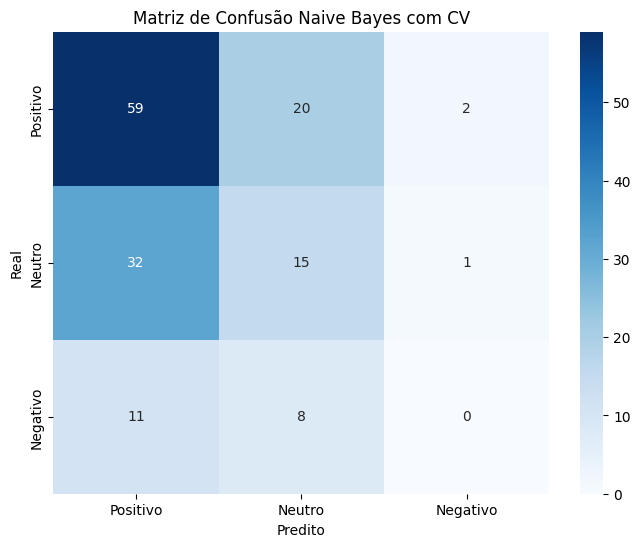

In [ ]:
# Passo 4: Plotar a matriz de confusão
from sklearn.metrics import confusion_matrix # import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the confusion matrix from the predictions and true labels
cm = confusion_matrix(y_test, predict_cv)

target_names=["Positivo","Neutro","Negativo"]
def plot_confusion_matrix(cm, classes, title='Matriz de Confusão', cmap=plt.cm.Blues):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

# Exibir o gráfico
plot_confusion_matrix(cm, classes=target_names, title='Matriz de Confusão Naive Bayes com CV')

MODELO RANDOM FOREST

In [ ]:
#método de florestas aleatórias
!pip install --upgrade scikit-learn
!pip uninstall scikit-learn -y
!pip install scikit-learn

Found existing installation: scikit-learn 1.7.1
Uninstalling scikit-learn-1.7.1:
  Successfully uninstalled scikit-learn-1.7.1
  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Criar e treinar o modelo
model = CatBoostClassifier(
    iterations=100,  # Número de árvores
    depth=6,         # Profundidade das árvores
    learning_rate=0.1,
    loss_function='MultiClass',  # Função de perda para problemas multiclasse
    random_state=0,
    verbose=0        # Desativa o output detalhado
)
model.fit(X_cv_train, y_train)

In [ ]:
clf_cv_rf = model.fit(X_cv_train,y_train)
predict_cv_rf = clf_cv_rf.predict(X_cv_test)

In [ ]:
print(classification_report(y_test,
                            predict_cv_rf,
                            target_names=["Positive","Neutral","Negative"]))

              precision    recall  f1-score   support

    Positive       0.57      0.89      0.69        81
     Neutral       0.33      0.15      0.20        48
    Negative       0.00      0.00      0.00        19

    accuracy                           0.53       148
   macro avg       0.30      0.34      0.30       148
weighted avg       0.42      0.53      0.44       148



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


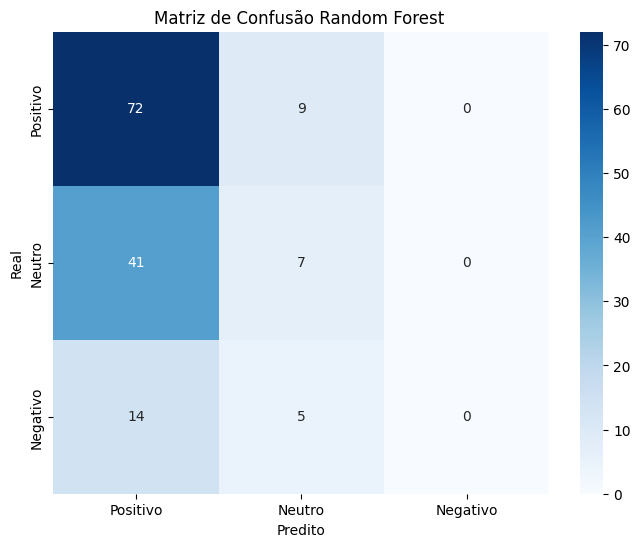

In [ ]:
# Passo 4: Plotar a matriz de confusão
from sklearn.metrics import confusion_matrix # import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the confusion matrix from the predictions and true labels
cm = confusion_matrix(y_test, predict_cv_rf)

target_names=["Positivo","Neutro","Negativo"]
def plot_confusion_matrix(cm, classes, title='Matriz de Confusão', cmap=plt.cm.Blues):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

# Exibir o gráfico
plot_confusion_matrix(cm, classes=target_names, title='Matriz de Confusão Random Forest ')

MODELAGEM SVC

In [ ]:
#Outro método SVC
!pip install --upgrade scikit-learn
!pip install --upgrade numpy

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn

Found existing installation: scikit-learn 1.7.1
Uninstalling scikit-learn-1.7.1:
  Successfully uninstalled scikit-learn-1.7.1
  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [ ]:
!pip install scikit-learn --upgrade
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', probability = True)

In [ ]:
clf_cv_svc = svc.fit(X_cv_train,y_train)
predict_cv_svc = clf_cv_svc.predict(X_cv_test)

In [ ]:
print(classification_report(y_test,
                            predict_cv_svc,
                            target_names=["Positive","Neutral","Negative"]))   ###accuracy deu muito baixa

              precision    recall  f1-score   support

    Positive       0.60      0.59      0.60        81
     Neutral       0.30      0.35      0.33        48
    Negative       0.00      0.00      0.00        19

    accuracy                           0.44       148
   macro avg       0.30      0.32      0.31       148
weighted avg       0.43      0.44      0.43       148



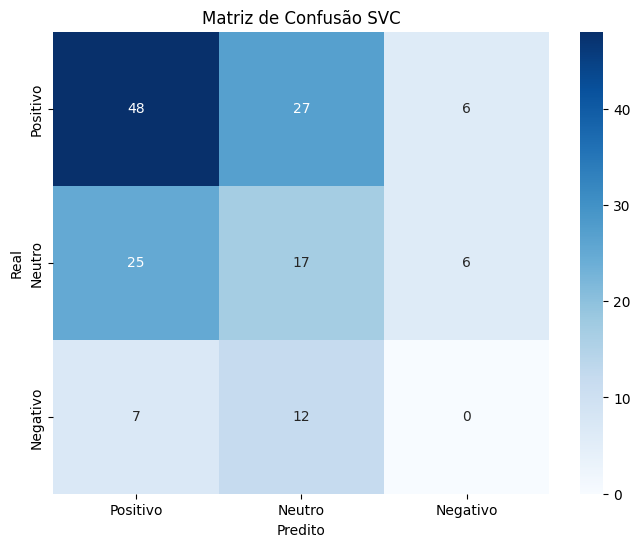

In [ ]:
# Passo 4: Plotar a matriz de confusão
from sklearn.metrics import confusion_matrix # import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the confusion matrix from the predictions and true labels
cm = confusion_matrix(y_test, predict_cv_svc)

target_names=["Positivo","Neutro","Negativo"]
def plot_confusion_matrix(cm, classes, title='Matriz de Confusão', cmap=plt.cm.Blues):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

# Exibir o gráfico
plot_confusion_matrix(cm, classes=target_names, title='Matriz de Confusão SVC')

modelagem KNN

In [ ]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.7.1
Uninstalling scikit-learn-1.7.1:
  Successfully uninstalled scikit-learn-1.7.1


In [ ]:
!pip install --upgrade --force-reinstall scikit-learn

  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 428.5 kB/s eta 0:00:00
Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 2.2 MB/s eta 0:00:00
Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
  Attempting uninstall:

In [ ]:
!pip install --upgrade numpy

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score

In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.6.1
!pip install --upgrade --force-reinstall scikit-learn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)


  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.16.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
Using cached scipy-1.16.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully un

In [ ]:
from sklearn.neighbors import KNeighborsClassifier ##unico que não consegui rodar

ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py)

In [ ]:

# Vetorização dos textos
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df_corpus_sem_na['texto']).toarray()
y = df_corpus_sem_na['sentimento_final']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Criando o classificador KNN
knn = KNeighborsClassifier(n_neighbors=5) #escolha de 5 vizinhos
knn.fit(X_train, y_train)

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
#KNN
# Fazendo previsões
y_pred = knn.predict(X_test)

# Avaliando o modelo
print("Acurácia do modelo KNN:", accuracy_score(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))

In [ ]:
# Passo 4: Plotar a matriz de confusão
from sklearn.metrics import confusion_matrix # import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the confusion matrix from the predictions and true labels
cm = confusion_matrix(y_test, y_pred)

target_names=["Neutro","Negativo"]
def plot_confusion_matrix(cm, classes, title='Matriz de Confusão', cmap=plt.cm.Blues):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

# Exibir o gráfico
plot_confusion_matrix(cm, classes=target_names, title='Matriz de Confusão KNN')